## Student #1 ID: 302963038

## Student #2 ID: 201508652

# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise.
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Those tests will not be graded nor checked.
1. You are free to add code and markdown cells as you see fit.
1. Write your functions in this jupyter notebook only. Do not create external python modules and import from them.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only, unless otherwise mentioned.
1. Your code must run without errors
1. Write your own code. Cheating will not be tolerated. 
1. Answers to qualitative questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. No not use ZIP or RAR. For example, your submission should look like this: `123456789.ipynb` if you worked by yourself or `123456789_987654321.ipynb` if you worked in pairs.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Take a minute and practice your object oriented skills. Create a tree with some nodes and make sure you understand how objects in python work.

In [131]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [132]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x1f0ae62d648>, <__main__.Node at 0x1f0ae7f7b88>]

## Data preprocessing

We will use the breast cancer dataset that is available as a part of sklearn. In this example, our dataset will be a single matrix with the **labels on the last column**. Notice that you are not allowed to use additional functions from sklearn.

In [133]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# load dataset
X, y = datasets.load_breast_cancer(return_X_y = True)
X = np.column_stack([X,y]) # the last column holds the labels

# split dataset
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (426, 31)
Testing dataset shape:  (143, 31)


## Impurity Measures (10 points)

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` (5 points) and `calc_entropy` (5 points). You are encouraged to test your implementation.

In [134]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """
    gini = 0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    labels = data[:,-1]
    ones = (labels==1).sum()/len(labels)
    zeroes = (labels==0).sum()/len(labels)
    gini = 1-(((ones)**2)+((zeroes)**2))
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return gini

In [135]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    entropy = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    labels = data[:,-1]
    ones = (labels==1).sum()/len(labels)
    zeroes = (labels==0).sum()/len(labels)
    if ones==0 or zeroes==0:
        return 0
    else:
        entropy = -ones*np.log2(ones)-zeroes*np.log2(zeroes)
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return entropy


## Building a Decision Tree (50 points)

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the **feature** and **value** used for the split and the **children** of that node. In addition, it might be a good idea to store the **prediction** in that node, the **height** of the tree for that node and whether or not that node is a **leaf** in the tree.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes continuous data. For this exercise, create at most a **single split** (meaning, this tree is binary) for each node of the tree. Determine the threshold for splitting by checking all possible features and the values available for splitting. When considering the values, take the average of each consecutive pair. For example, for the values [1,2,3,4,5] you should test possible splits on the values [1.5, 2.5, 3.5, 4.5]. 
5. After you complete building the class for a decision node in the tree, complete the function `build_tree`. This function takes as input the training dataset and the impurity measure. Then, it initializes a root for the decision tree and constructs the tree according to the procedure you saw in class.
1. Once you are finished, construct two trees: one with Gini as an impurity measure and the other using Entropy.

In [136]:
class DecisionNode:
    '''
    This class will hold everyhing you need to construct a node in a DT. You are required to 
    support basic functionality as previously described. It is highly recommended that you  
    first read and understand the entire exercises before diving into this class.
    You are allowed to change the structure of this class as you see fit.
    '''
 
    def __init__(self, data,feature=None,count=None,value=None,childrenData=None,height = None,leaf = "A node" ,left_child = None,right_child = None, prediction = None,left_branch = None,right_branch = None,left_leaf=None,right_leaf = None,n_nodes=None):
        # you should take more arguments as inputs when initiating a new node
        self.data = data
        self.children = []
        self.left_branch = left_branch
        self.right_branch = right_branch
        self.left_leaf = left_leaf
        self.right_leaf = right_leaf
        self.childrenData = childrenData
        self.feature = feature
        self.threshold = value
        self.count = count
        self.height = height 
        self.leaf = leaf
        self.left_child = left_child
        self.right_child = right_child
        self.prediction = prediction
        self.n_nodes = n_nodes

        
    def add_child(self, node):
        self.children.append(node)
        
    def counter(self):
        outcomes = self.data[:,-1]
        zeroes = (outcomes==0).sum()
        ones = (outcomes==1).sum()
        self.count = [ones,zeroes]
    
        
        
    def leafer(self):
    	self.leaf = "A leaf!" 
            
    def predictioner(self):
        outcomes = self.data[:,-1]
        zeroes = (outcomes==0).sum()
        ones = (outcomes==1).sum()
        self.prediction = {'0':(zeroes/len(outcomes))*100,'1':(ones/len(outcomes))*100}
     
    def check_split(self, feature, value, returnChild):
        # this function divides the data according to a specific feature and value
        # you should use this function while testing for the optimal split
            subset_above = self.data[self.data[:,feature]>=value]           
            subset_below = self.data[self.data[:,feature]<=value]
            if returnChild == True:
                return [[(subset_above[:,-1]==1).sum(),(subset_above[:,-1]==0).sum()],[(subset_below[:,-1]==1).sum(),(subset_below[:,-1]==0).sum()]]
            else:    
                return (subset_above,subset_below)

    
    def split(self, impurity_measure):
        # this function goves over all possible features and values and finds
        # the optimal split according to the impurity measure. Note: you can
        # send a function as an argument
        
        b_col, b_val, b_score = None, None, 1
        nfeatures = self.data.shape[1]-1
        for i in range(nfeatures):
            feature = np.sort(self.data[:,i])
            avg = [sum(feature[i:i + 2])/2 for i in range(len(feature) - 2 + 1)] 
            for j in range(len(avg)):
                subset_above, subset_below = self.check_split(i,avg[j],False)
                score_above = impurity_measure(subset_above)
                score_below = impurity_measure(subset_below)
                score = ((len(subset_above[:,-1])/len(self.data[:,-1]))*score_above)+ ((len(subset_below[:,-1])/len(self.data[:,-1]))*score_below)
                if score < b_score:
                    b_col, b_val, b_score = i, avg[j], score
                    
        self.children = self.check_split(b_col,b_val,True)
        self.childrenData = self.check_split(b_col,b_val,False)
        self.feature = b_col
        self.threshold = b_val
        self.counter()
        global n_nodes
        n_nodes += 2
  
    
        
        
        
    def split_child(self,impurity_measure,height = 0):
        global hight
        left, right = self.childrenData
        left_count, right_count = self.children
        self.childrenData = None    
        # left branch
        if 0 in left_count:
            node = DecisionNode(left)
            node.leafer()
            node.predictioner()
            node.count = self.children[0]
            self.left_leaf = node
            self.left_branch = node
            self.height = height
            node.height = height
        else:
            node = DecisionNode(left)
            self.left_branch = node
            self.height = height
            node.split(impurity_measure)
            node.split_child(impurity_measure,height+1)
    	# right branch
        if 0 in right_count:
            node = DecisionNode(right)
            node.leafer()
            node.predictioner()
            node.count = self.children[1]
            self.right_leaf = node
            self.right_branch = node
            self.height = height
            node.height = height
        else:
            node = DecisionNode(right)
            self.right_branch = node
            self.height = height
            node.split(impurity_measure)
            node.split_child(impurity_measure,height+1)
        if self.left_leaf is not None or self.right_leaf is not None:
            self.predictioner()
            global predictions
            zibi = self.prediction
            predictions.append(max(zibi.values()))  

In [137]:
def build_tree(data,impurity_measure):
    """
    Build a tree using the given impurity measure and training dataset. 
    You are required to fully grow the tree until all leaves are pure. 
 
    Input:
    - data: the training dataset.
    - impurity: the chosen impurity measure. Notice that you can send a function
                as an argument in python.
 
    Output: the root node of the tree.
    """
    root = None
    global n_nodes
    n_nodes = 1
    global predictions
    predictions = []
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    root = DecisionNode(data)
    root.split(impurity_measure)
    root.split_child(impurity_measure,0)
    root.n_nodes = n_nodes
    return root

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return root        

In [138]:
# python support passing a function as arguments to another function.
tree_gini = build_tree(data=X_train, impurity_measure=calc_gini) 
tree_entropy = build_tree(data=X_train, impurity_measure=calc_entropy)

## Tree evaluation (10 points)

Complete the functions `predict` and `calc_accuracy`.

After building both trees using the training set (using Gini and Entropy as impurity measures), you should calculate the accuracy on the test set and print the measure that gave you the best test accuracy. For the rest of the exercise, use that impurity measure. (10 points)

In [139]:
def predict(node, instance):
    """
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. 
 
    Output: the prediction of the instance.
    """
    pred = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    if node.left_leaf is not None or node.right_leaf is not None:
        if node.left_leaf is not None and instance[node.feature]>=node.threshold:
            pred = node.left_leaf.prediction
            return pred
        elif node.right_leaf is not None and instance[node.feature]<=node.threshold:
            pred = node.right_leaf.prediction  
            return pred
            

    if instance[node.feature]>=node.threshold:
        return predict(node.left_branch,instance)
    else:
        return predict(node.right_branch,instance)
    
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return pred

In [140]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the decision tree on the given dataset (%).
    """
    accuracy = 0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    for row in dataset:
        zubi = predict(node,row)
        pred = max(zubi,key=zubi.get)
        if pred == str(int(row[-1])):
            accuracy+=1
            
    accuracy = (accuracy/len(dataset))*100
        
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return accuracy

In [141]:
print ('The accuracy using Gini is: ',calc_accuracy(tree_gini,X_test))
print ('The accuracy using entropy is: ',calc_accuracy(tree_entropy,X_test))

The accuracy using Gini is:  93.00699300699301
The accuracy using entropy is:  93.7062937062937


## Print the tree (10 points)

Complete the function `print_tree`. Your code should do something like this (10 points):
```
[X0 <= 1],
  [X1 <= 2]
    [X2 <= 3], 
       leaf: [{1.0: 10}]
       leaf: [{0.0: 10}]
    [X4 <= 5], 
       leaf: [{1.0: 5}]
       leaf: [{0.0: 10}]
   leaf: [{1.0: 50}]
```

In [142]:
def print_tree(node, spacing=""):
    """
    Prints the tree similar to the example above.
    As long as the print is clear, any printing scheme will be fine
    
    Input:
    - node: a node in the decision tree.
 
    Output: This function has no return value.
    """
    
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################

    print (spacing + 'Node ' + str(node.count))  #        
    if node.left_leaf is not None and node.right_leaf is not None:
        print (spacing + 'Feature ' + str(node.feature))
        print (spacing + 'Cutoff ' + str(node.threshold))
        print (spacing ,node.left_leaf.leaf + ' left', node.left_leaf.count)
        print (spacing ,node.right_leaf.leaf + ' right', node.right_leaf.count)
        return
    else:
        if node.left_leaf is not None or node.right_leaf is not None:
            if node.left_leaf is not None:
                print (spacing + 'Feature ' + str(node.feature))
                print (spacing + 'Cutoff ' + str(node.threshold))                    
                print (spacing ,node.left_leaf.leaf + ' left', node.left_leaf.count)
                print (spacing + '--> Right:')                    
                print_tree(node.right_branch, spacing + "  ")
            if node.right_leaf is not None:
                print (spacing + 'Feature ' + str(node.feature))
                print (spacing + 'Cutoff ' + str(node.threshold)) 
                print (spacing ,node.right_leaf.leaf + ' right', node.right_leaf.count)
                print (spacing + '--> Left:')                      
                print_tree(node.left_branch, spacing + "  ")
            return    
    if node.left_branch is not None:  
        print (spacing + 'Feature ' + str(node.feature))
        print (spacing + 'Cutoff ' + str(node.threshold))
        print (spacing + '--> Left:')
        print_tree(node.left_branch, spacing + "  ")
        
    
    if node.right_branch is not None:  
        print (spacing + 'Feature ' + str(node.feature))
        print (spacing + 'Cutoff ' + str(node.threshold))
        print (spacing + '--> Right:')
        print_tree(node.right_branch, spacing + "  ")
        
   
    
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return

In [143]:
print_tree(tree_entropy)

Node [258, 168]
Feature 27
Cutoff 0.14235
--> Left:
  Node [9, 146]
  Feature 13
  Cutoff 21.924999999999997
  --> Left:
    Node [1, 140]
    Feature 4
    Cutoff 0.079285
     A leaf! left [0, 140]
     A leaf! right [1, 0]
  Feature 13
  Cutoff 21.924999999999997
  --> Right:
    Node [8, 6]
    Feature 21
    Cutoff 29.0
     A leaf! left [0, 5]
    --> Right:
      Node [8, 1]
      Feature 1
      Cutoff 20.52
       A leaf! left [0, 1]
       A leaf! right [8, 0]
Feature 27
Cutoff 0.14235
--> Right:
  Node [249, 22]
  Feature 3
  Cutoff 696.25
  --> Left:
    Node [7, 16]
    Feature 1
    Cutoff 19.72
     A leaf! left [0, 13]
    --> Right:
      Node [7, 3]
      Feature 6
      Cutoff 0.073105
       A leaf! left [0, 3]
       A leaf! right [7, 0]
  Feature 3
  Cutoff 696.25
  --> Right:
    Node [242, 6]
    Feature 27
    Cutoff 0.1349
    --> Left:
      Node [7, 4]
      Feature 15
      Cutoff 0.02744
       A leaf! left [6, 0]
      --> Right:
        Node [1, 4]
     

## Post pruning (20 points)

Construct a decision tree and perform post pruning: For each leaf in the tree, calculate the test accuracy of the tree assuming no split occurred on the parent of that leaf and find the best such parent (in the sense that not splitting on that parent results in the best testing accuracy among possible parents). Make that parent into a leaf and repeat this process until you are left with the root. On a single plot, draw the training and testing accuracy as a function of the number of internal nodes in the tree. Explain and visualize the results and print your tree (20 points).

In [144]:
###########################################################################
# TODO: Implement the function.                                           #
###########################################################################
def pruning(node,train_data,test_data,switch):
    global predictions 
    global maxpred
    if switch:
        accu_train,accu_test = [calc_accuracy(node,train_data)],[calc_accuracy(node,test_data)]
        nodes = [node_count(node,switch= True)]
        switch = False
        maxpred = max(predictions)
        newtree = maxfinder(node,maxpred)
        accu_train.append(calc_accuracy(newtree,train_data))
        accu_test.append(calc_accuracy(newtree,test_data))
        new_nodes = node_count(newtree,switch= True)
        nodes.append(new_nodes)
    while nodes[-1] != 1:
        maxpred = max(predictions)
        old_predictions = predictions.copy()
        newtree = maxfinder(newtree,maxpred) 
        if predictions != old_predictions:
            accu_train.append(calc_accuracy(newtree,train_data))
            accu_test.append(calc_accuracy(newtree,test_data))
            new_nodes = node_count(newtree,switch= True)
            nodes.append(new_nodes)
        else:
            predictions.remove(maxpred)
    nodes.append(0)
    node.predictioner()
    pred = max(node.prediction.values())
    node.leafer()
    node.leaf
    outcomes = test_data[:,-1]
    zeroes = (outcomes==0).sum()
    ones = (outcomes==1).sum()
    pred_test_root = max([(zeroes/len(outcomes))*100,(ones/len(outcomes))*100])
    accu_train.append(pred), accu_test.append(pred_test_root)
    return nodes,accu_train,accu_test

def maxfinder(node,maxval):
    global predictions
    if (node.left_branch.left_leaf is not None or node.left_branch.right_leaf is not None) and max(node.left_branch.prediction.values()) == maxval :
        node.predictioner()
        pred = max(node.prediction.values())
        node.left_branch.leafer()
        node.left_leaf = node.left_branch
        predictions.remove(maxval)
        predictions.append(pred)
    if (node.right_branch.left_leaf is not None or node.right_branch.right_leaf is not None) and max(node.right_branch.prediction.values()) == maxval:
        node.predictioner()
        pred = max(node.prediction.values())
        node.right_branch.leafer()
        node.right_leaf = node.right_branch
        predictions.remove(maxval)
        predictions.append(pred)
    if node.left_leaf is not None and node.right_leaf is not None:
        if node.height == 0:
            return node
        return
    else:
        if node.left_leaf is not None or node.right_leaf is not None:
             if node.left_leaf is not None:
                 maxfinder(node.right_branch,maxval)
             if node.right_leaf is not None:
                 maxfinder(node.left_branch,maxval)
             if node.height == 0:
                 return node
             return
        maxfinder(node.left_branch,maxval)
        maxfinder(node.right_branch,maxval)
        return node

def node_count(node,switch):
    global counter 
    if switch:
        counter = 0
        switch = False
    counter += 1    
    if node.left_leaf is not None and node.right_leaf is not None:
        if node.height == 0:
            return counter
        return
    else:
        if node.left_leaf is not None or node.right_leaf is not None:
             if node.left_leaf is not None:
                 node_count(node = node.right_branch,switch=False)
             if node.right_leaf is not None:
                 node_count(node = node.left_branch,switch=False)
             if node.height == 0:
                 return counter
             return
        node_count(node = node.left_branch,switch=False)
        node_count(node = node.right_branch,switch=False)
    return counter

###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

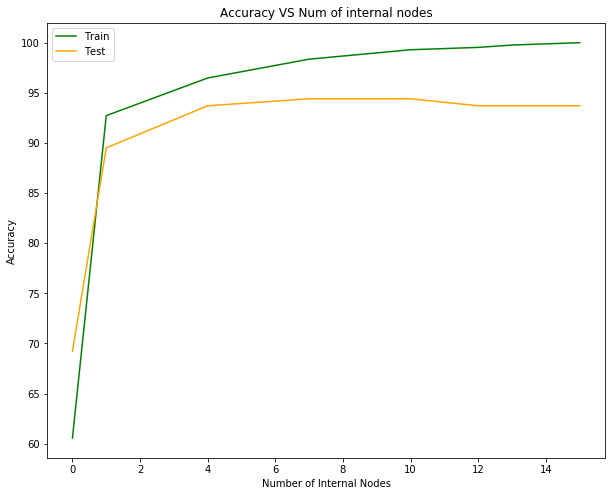

Node [258, 168]
Feature 27
Cutoff 0.14235
 A leaf! left [9, 146]
 A leaf! right [249, 22]


In [145]:
nodes,accu_train,accu_test= pruning(tree_entropy,X_train,X_test,True)  

plt.plot(nodes, accu_train, color='g',label = 'Train')
plt.plot(nodes, accu_test, color='orange',label = 'Test')
plt.xlabel('Number of Internal Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy VS Num of internal nodes')
plt.legend()
plt.show()

print_tree(tree_entropy)

As can be seen from the graph, the decision tree overfit very quickly. It's seems that after only one split the optimal solution is achieved. The two leaves made after one split shows an immense increase in purity. Climbing up the tree does not add significantlly to the purity of the tree and thus the end point is not doing much better on the test data. And we learn from this that splitting the tree to its purest form (all leaves are pure) will be more computationally expensive with solution that is 1. Not generalized enough 2. Does not add much or any new information, even to the training data.   